In [15]:
import json

file_path = "history_example.json"
file_data = open(file_path, 'r', encoding="UTF8").read()
history = json.loads(file_data, encoding="UTF8")

print(f'Loaded history data from {file_path}')
print(f'Found a total of {len(history)} videos watched')

Loaded history data from history_example.json
Found a total of 13 videos watched


In [16]:
from video import Video, VideoByChannel
from tqdm import tqdm

videos_watched = [Video(video_data) for video_data in tqdm(history)]

print(f'Parsed {len(videos_watched)} videos')

100%|██████████| 13/13 [00:00<00:00, 2607.28it/s]


Parsed 13 videos


In [17]:
import math

total_time = videos_watched[0].time - videos_watched[-1].time
print(f'Between the time you first watched a video and your last view, {total_time.days} days have passed')
hours = math.floor(total_time.seconds / 3600)
minutes = math.floor((total_time.seconds % 3600) / 60)
seconds = (total_time.seconds % 60)
print(f'{total_time.days} days, {hours} hours, {minutes:.0f} minutes and {seconds} seconds to be exact.')

Between the time you first watched a video and your last view, 30 days have passed
30 days, 4 hours, 10 minutes and 49 seconds to be exact.


In [18]:
print(f'On average you watched {len(videos_watched)/total_time.days:.4f} videos per day')

On average you watched 0.4333 videos per day


In [19]:
from collections import Counter
from matplotlib import pyplot as plt

video_counter = Counter(videos_watched)
print(f'You watched a total of {len(video_counter)} unique videos')
print("Your top 20 most watched videos are:")
for video, amount in video_counter.most_common(20):
    print(f'    {amount} views: {video}')

You watched a total of 10 unique videos
Your top 20 most watched videos are:
    3 views: Voyboy vs BoxBox! || "The Balance of Power Must be Preserved." || Chess.com Pogchamps angesehen by @agadmator's Chess Channel
    2 views: Surprise, Disgust, Happiness || Carlsen vs Giri || Chessable Masters (2020) angesehen by @agadmator's Chess Channel
    1 views: LoFi House Mix 1988 | The Stoner House Edition by @Katarakt angesehen by @Fear N Loathing
    1 views: Money, Love & Lots of Tape | THE NICO SEMSROTT SHOW angesehen by @Nico Semsrott
    1 views: Legendary Mr. Barnes || Morphy vs Barnes (1858) angesehen by @agadmator's Chess Channel
    1 views: Mate in 8, But Really it's Instant  || Barnes vs Morphy (1858) angesehen by @agadmator's Chess Channel
    1 views: Branchless Programming: Why "If" is Sloowww... and what we can do about it! angesehen by @What's a Creel?
    1 views: tagesschau 20:00 Uhr, 15.07.2020 angesehen by @tagesschau
    1 views: Voyboy vs Hutch! || The Grand Finale ||

You have watched a total of 2 videos more than once:


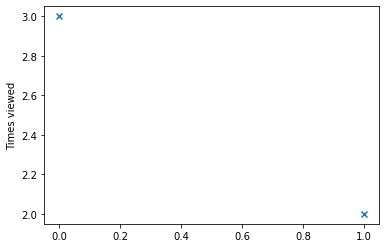

In [20]:
videos_watched_more_than_once = [
    (video, amount) for video, amount in video_counter.most_common()
    if amount > 1
]

print(f'You have watched a total of {len(videos_watched_more_than_once)} videos more than once:')
plt.scatter(
    range(len(videos_watched_more_than_once)), 
    [amount for video, amount in videos_watched_more_than_once],
    marker="x"
)
plt.ylabel("Times viewed")
plt.show()

In [21]:
videos_watched_by_channel = [VideoByChannel(video_data) for video_data in tqdm(history)]
channel_counter = Counter(videos_watched_by_channel)
print(f'You watched a total of {len(channel_counter)} unique channels')
print("Your top 40 most watched channels are:")
for video, amount in channel_counter.most_common(40):
    print(f'    {amount} views: {video.channel_name}')

100%|██████████| 13/13 [00:00<00:00, 13028.90it/s]


You watched a total of 5 unique channels
Your top 40 most watched channels are:
    9 views: agadmator's Chess Channel
    1 views: Fear N Loathing
    1 views: Nico Semsrott
    1 views: What's a Creel?
    1 views: tagesschau


You have watched a total of 1 channels more than once:


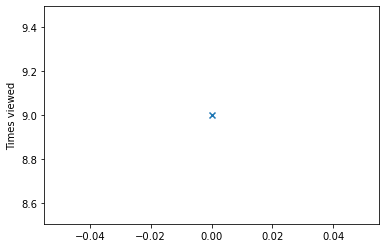

In [22]:
channels_watched_more_than_once = [
    (video, amount) for video, amount in channel_counter.most_common()
    if amount > 1
]

print(f'You have watched a total of {len(channels_watched_more_than_once)} channels more than once:')
plt.scatter(
    range(len(channels_watched_more_than_once)),
    [amount for video, amount in channels_watched_more_than_once],
    marker="x"
)
plt.ylabel("Times viewed")
plt.show()